In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/exchange-rate-twi.csv")
df.columns = ['Month', 'Exchange Rate']
df.head()

,Month,Exchange Rate
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
df = df.set_index('Month')

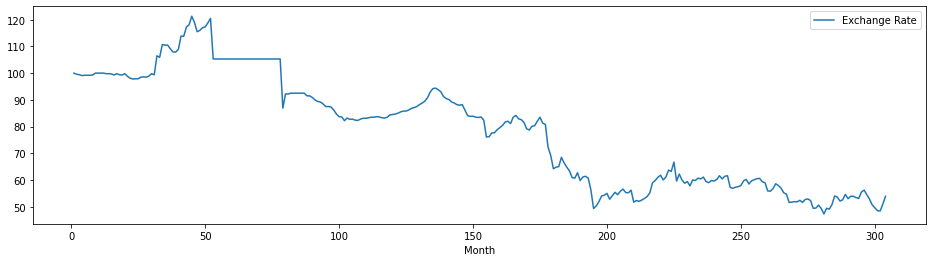

In [4]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [5]:
print("No. of data points:", len(df))

No. of data points: 304


In [6]:
train_size = 212
train = df[0:train_size]
test = df[train_size:]

In [7]:
y_hat = test.copy()

In [8]:
# Naive Method
y_hat['naive_forcast'] = train['Exchange Rate'][train_size-1]
print(y_hat['naive_forcast']) 

Month
213    52.3
214    52.3
215    52.3
216    52.3
217    52.3
       ... 
300    52.3
301    52.3
302    52.3
303    52.3
304    52.3
Name: naive_forcast, Length: 92, dtype: float64


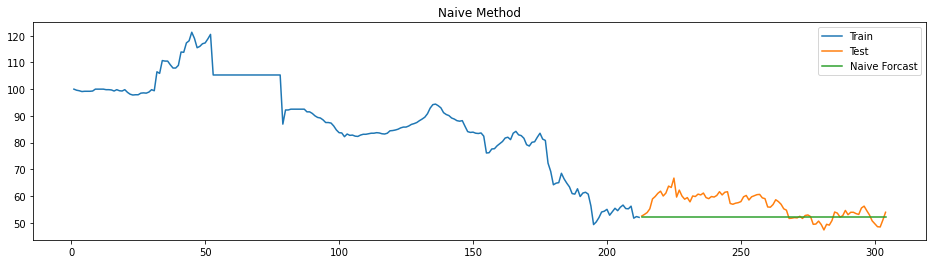

In [9]:
plt.figure(figsize=(16,4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat['naive_forcast'], label='Naive Forcast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [10]:
# Simple Avg. Method
y_hat['avg_forcast'] = train['Exchange Rate'].mean()
print(y_hat['avg_forcast'])

Month
213    88.325472
214    88.325472
215    88.325472
216    88.325472
217    88.325472
         ...    
300    88.325472
301    88.325472
302    88.325472
303    88.325472
304    88.325472
Name: avg_forcast, Length: 92, dtype: float64


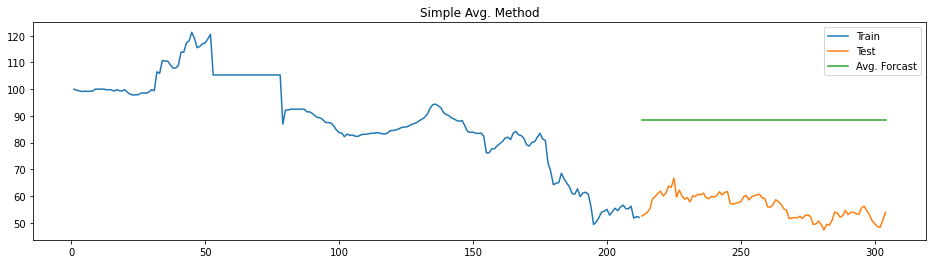

In [11]:
plt.figure(figsize=(16,4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat['avg_forcast'], label='Avg. Forcast')
plt.legend(loc='best')
plt.title('Simple Avg. Method')
plt.show()

## Calculating Error

In [12]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat['naive_forcast'])) 
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat['naive_forcast'])*100/test['Exchange Rate']))

In [13]:
results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results.head()

,Method,MAPE,RMSE
0,Naive Method,8.0,5.777646


- Looking at MAPE, The accuracy is around 92% for this model

In [14]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat['avg_forcast'])) 
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat['avg_forcast'])*100/test['Exchange Rate']))

In [15]:
results = results.append(pd.DataFrame({'Method':['Simple Avg. Method'], 'MAPE':[mape], 'RMSE':[rmse]}))
results.head()

,Method,MAPE,RMSE
0,Naive Method,8.0,5.777646
0,Simple Avg. Method,58.0,32.417927


- Looking at MAPE, The accuracy is around 42% for this model

- Naive Method seems to be better performing on comparing the error.

In [16]:
y_hat_sma = df.copy()
window = 3
y_hat_sma['moving_avg_forcast'] = df['Exchange Rate'].rolling(window).mean()
y_hat_sma['moving_avg_forcast'][train_size:] = y_hat_sma['moving_avg_forcast'][train_size-1]
print(y_hat_sma['moving_avg_forcast'])

Month
1            NaN
2            NaN
3      99.666667
4      99.366667
5      99.233333
         ...    
300    53.400000
301    53.400000
302    53.400000
303    53.400000
304    53.400000
Name: moving_avg_forcast, Length: 304, dtype: float64


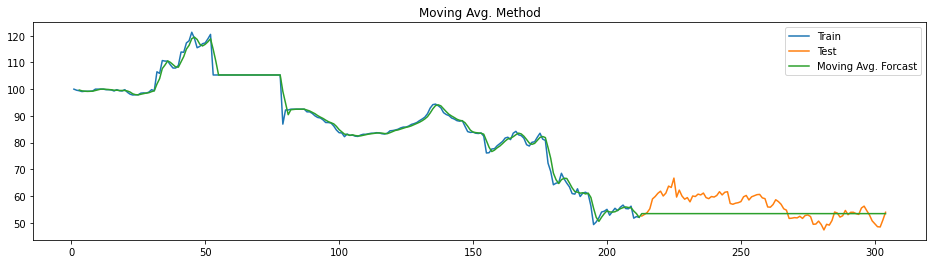

In [17]:
plt.figure(figsize=(16,4))
plt.plot(train['Exchange Rate'], label='Train')
plt.plot(test['Exchange Rate'], label='Test')
plt.plot(y_hat_sma['moving_avg_forcast'], label='Moving Avg. Forcast')
plt.legend(loc='best')
plt.title('Moving Avg. Method')
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate'], y_hat_sma['moving_avg_forcast'][train_size:])) 
mape = np.round(np.mean(np.abs(test['Exchange Rate'] - y_hat_sma['moving_avg_forcast'][train_size:])*100/test['Exchange Rate']))

In [19]:
results = results.append(pd.DataFrame({'Method':['Moving Avg. Method'], 'MAPE':[mape], 'RMSE':[rmse]}))
results.head()

,Method,MAPE,RMSE
0,Naive Method,8.0,5.777646
0,Simple Avg. Method,58.0,32.417927
0,Moving Avg. Method,7.0,5.102227
